In [343]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

母平均が10のt値：-2.499745224123042
母平均が10である確率(p値)：0.016744120865409624
-0.09076364693891215 16.09076364693891


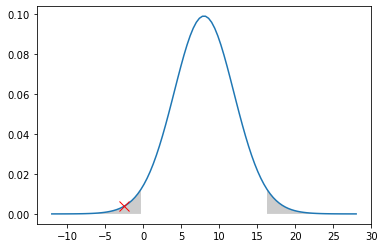

In [368]:
"""1標本t検定"""
# 分布の中心, 標準偏差
center = 8
sigma = 4
# 比較する標本の位置
pos = 10
# サンプル数
u = 40

y = np.random.normal(center, sigma, u)

# t値とp値を求める
t, p = stats.ttest_1samp(y, popmean=pos)
print(f'母平均が{pos}のt値：'+str(t))
print(f'母平均が{pos}である確率(p値)：'+str(p))

# サンプル数、自由度
n, k = len(y), u-1

############################
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

# t分布を描画する
x = np.linspace(center-20, center+20, 100)
ax.plot(x, stats.t.pdf(x, k, loc=center, scale=sigma))

#　分布のt値
ax.plot(t, stats.t.pdf(t, k, loc=center, scale=sigma), 'x', color='red', markersize=10)

# t分布の95%信頼区間から外れた領域を描画する
bottom, up = stats.t.interval(alpha=0.95, df=k, loc=center, scale=sigma)
print(bottom, up)
plt.fill_between(x, stats.t.pdf(x, k, loc=center, scale=sigma), 
                 0, where=(x>=up)|(x<=bottom), facecolor='black', alpha=0.2)

plt.show()